# Variability Statistics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.cm as cm

In [51]:
clean_path = r"C:\Users\jhzhe\dev\MPhys-Project\output_data\atlas_query\output\neutrino_133119_22683750_galaxy0\neutrino_133119_22683750_galaxy0\neutrino_133119_22683750_galaxy0.c.4.00days.lc.txt"
avg_path = r"C:\Users\jhzhe\Cloned_Repos\MPhys-Project\output_data\atlas_query\output\neutrino_139912\neutrino_139912_46959751_galaxy0\neutrino_139912_46959751_galaxy0\neutrino_139912_46959751_galaxy0.c.clean.lc.txt"
df = pd.read_csv(clean_path, delim_whitespace=True)
filtered_df = df[(df['uJy'].notna()) & (df['MJD'].notna())]
filtered_df.head()

C:\Users\jhzhe\AppData\Local\Temp\ipykernel_13580\3606921105.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(clean_path, delim_whitespace=True)


,MJD,MJDbin,uJy,duJy,stdev,x2,Nclip,Ngood,Nexcluded,Mask,m,dm
0,58635.533426,58637.0,162.679310,4.227986,12.767145,2.229885,0,4,0,0x0000,18.371669,0.028218
1,58639.504072,58641.0,178.393334,13.918098,8.082904,0.060436,1,3,0,0x0000,18.271553,0.084708
7,58663.486081,58665.0,100.263566,5.478641,16.165808,0.759690,1,3,0,0x0000,18.897142,0.059327
8,58667.431375,58669.0,115.427586,4.227986,4.924429,0.333654,0,4,0,0x0000,18.744226,0.039769
14,58691.780720,58693.0,79.124355,2.896878,19.000731,1.704383,0,9,0,0x0000,19.154225,0.039751


In [52]:
def features(dataframe, flux_column='uJy'):
    N = len(dataframe)
    mean_flux = dataframe[flux_column].mean()
    mean_flux_squared = (dataframe[flux_column]**2).mean()
    std_flux = dataframe[flux_column].std()
    
    #error based weights
    inverse_variance = 1 / (dataframe['stdev']**2)
    weights = inverse_variance / inverse_variance.sum()
    dataframe['weights'] = weights
    dataframe['weighted_flux'] = dataframe['weights'] * dataframe[flux_column]

    try:
        chi_squared = (1 / (N - 1)) * np.sum((dataframe[flux_column] - dataframe['weighted_flux'])**2 / (dataframe['stdev']**2))

        V_v = (1 / mean_flux) * np.sqrt((N / (N-1)) * (mean_flux_squared - mean_flux**2))
    except ZeroDivisionError:
        chi_squared = np.nan
        V_v = np.nan

    return mean_flux, std_flux, chi_squared, V_v

def txt_finder(atlas_txt_dir, colour, avg):
    '''
    Finds the appropiate cleaned+averaged txt file for lightcurves
    '''
    txt_files = []
    for root, dirs, files in os.walk(atlas_txt_dir):
        for file in files:
            if file.endswith(f'{colour}.{avg}.00days.lc.txt'):
                txt_files.append(os.path.join(root, file))

    if txt_files:
        #logging.info(f'{txt_files}')
        return txt_files
    else:
        #logging.info('no light curve data processed')
        return

In [53]:
atlas_output_dir = r'C:\Users\jhzhe\dev\MPhys-Project\output_data\atlas_query\output'
c_txt = txt_finder(atlas_txt_dir=atlas_output_dir, colour='c',avg=4)
o_txt = txt_finder(atlas_txt_dir=atlas_output_dir, colour='o', avg=4)

mean_flux_c, std_flux_c, chi_squared_c, V_v_c = features(filtered_df)
print(chi_squared_c)
print(V_v_c)
print(np.log(chi_squared_c), np.log(np.abs(V_v_c)))
print(c_txt)

68.30246250369369
5.149231981396482
4.223945820153654 1.6388475737287607
['C:\\Users\\jhzhe\\dev\\MPhys-Project\\output_data\\atlas_query\\output\\neutrino_133119_22683750_galaxy0\\neutrino_133119_22683750_galaxy0\\neutrino_133119_22683750_galaxy0.c.4.00days.lc.txt', 'C:\\Users\\jhzhe\\dev\\MPhys-Project\\output_data\\atlas_query\\output\\neutrino_133119_22683750_galaxy1\\neutrino_133119_22683750_galaxy1\\neutrino_133119_22683750_galaxy1.c.4.00days.lc.txt', 'C:\\Users\\jhzhe\\dev\\MPhys-Project\\output_data\\atlas_query\\output\\neutrino_133119_22683750_galaxy10\\neutrino_133119_22683750_galaxy10\\neutrino_133119_22683750_galaxy10.c.4.00days.lc.txt', 'C:\\Users\\jhzhe\\dev\\MPhys-Project\\output_data\\atlas_query\\output\\neutrino_133119_22683750_galaxy11\\neutrino_133119_22683750_galaxy11\\neutrino_133119_22683750_galaxy11.c.4.00days.lc.txt', 'C:\\Users\\jhzhe\\dev\\MPhys-Project\\output_data\\atlas_query\\output\\neutrino_133119_22683750_galaxy12\\neutrino_133119_22683750_galaxy12\\n

C:\Users\jhzhe\AppData\Local\Temp\ipykernel_13580\890011964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['weights'] = weights
C:\Users\jhzhe\AppData\Local\Temp\ipykernel_13580\890011964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['weighted_flux'] = dataframe['weights'] * dataframe[flux_column]


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colours = cm
files = sorted(o_txt, key=lambda x: int(x.split("galaxy")[-1].split('.')[0]))
grouped_files = {}

# Group files by neutrino ID
for file in files:
    # Extract the neutrino ID (e.g., neutrino_139939)
    path_parts = file.replace("\\", "/").split("/")
    neutrino_id = next(part for part in path_parts if part.startswith("neutrino") and "_galaxy" not in part)
    if neutrino_id not in grouped_files:
        grouped_files[neutrino_id] = []
    grouped_files[neutrino_id].append(file)

# Plot data with unique colors and labels
for idx, (id, files) in enumerate(grouped_files.items()):
    for file in files:
        df = pd.read_csv(file, sep=r'\s+')
        filtered_df = df[(df['uJy'].notna()) & (df['MJD'].notna())]
        mean_flux, std_flux, chi_squared, V_v = features(filtered_df)
        if np.isnan(chi_squared) or np.isnan(V_v) or chi_squared == 0 or V_v == 0:
            continue
        plt.plot(
            np.log(chi_squared),
            np.log(np.absolute(V_v)),
            'o',
            color=colours[idx % len(colours)],  # Use modulo to avoid index overflow cool trick
            label=id if file == files[0] else ""  # Only label the first point for each ID
        )

# Add legend
plt.legend(loc='best')
plt.xlabel('log(chi_squared)')
plt.ylabel('log(V_v)')
plt.title('Feature Space')
plt.show()

# large chi_squared means significance deviation from the mean
# large V_v is the amplitude of variability


StopIteration: 

C:\Users\jhzhe\AppData\Local\Temp\ipykernel_13580\890011964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['weights'] = weights
C:\Users\jhzhe\AppData\Local\Temp\ipykernel_13580\890011964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['weighted_flux'] = dataframe['weights'] * dataframe[flux_column]
C:\Users\jhzhe\AppData\Local\Temp\ipykernel_13580\890011964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

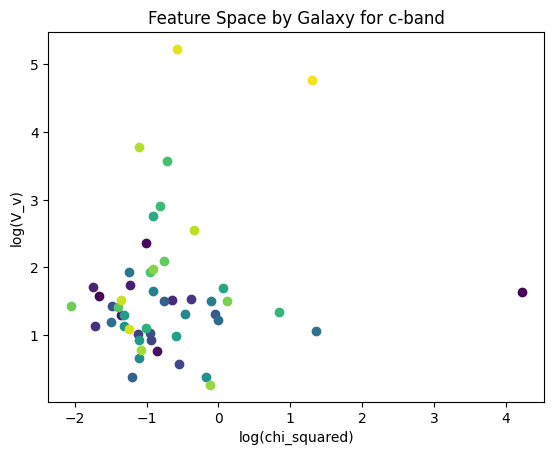

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a colormap with 50 colors using a built-in colormap
n_colours = 50
colormap = plt.cm.viridis
# Generate 50 colors from the colormap
colours = [colormap(i / n_colours) for i in range(n_colours)]

files = sorted(c_txt, key=lambda x: int(x.split("galaxy")[-1].split('.')[0]))
# Plot data with unique colors and labels for each galaxy
for idx, file in enumerate(files):
    df = pd.read_csv(file, sep=r'\s+')
    filtered_df = df[(df['uJy'].notna()) & (df['MJD'].notna())]
    mean_flux, std_flux, chi_squared, V_v = features(filtered_df)
    
    # Skip invalid data points
    if np.isnan(chi_squared) or np.isnan(V_v) or chi_squared == 0 or V_v == 0:
        continue
    
    # Extract galaxy number for labeling
    galaxy_number = file.split("galaxy")[-1].split('.')[0]
    
    plt.plot(
        np.log(np.abs(chi_squared)),
        np.log(np.absolute(V_v)),
        'o',
        color=colours[idx % len(colours)],  # Assign unique color per galaxy
        label=f"Galaxy {galaxy_number}"  # Label for the legend
    )

# Add legend, axis labels, and title
#plt.legend(loc='best')
plt.xlabel('log(chi_squared)')
plt.ylabel('log(V_v)')
plt.title('Feature Space by Galaxy for c-band')
plt.show()


In [25]:
# Create and display the legend in a separate figure
fig_legend = plt.figure(figsize=(6, len(handles) * 0.25))  # Adjust height based on the number of items
fig_legend.legend(handles, labels, loc='center', frameon=False)
fig_legend.suptitle('Legend', fontsize=12)
fig_legend.tight_layout()

# Display the legend
plt.show()

<Figure size 600x1275 with 0 Axes>